## ***Part 1: Setting Up Project with Data and Any Needed Libaries***

In [51]:
#Importing libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import geopy.distance as gp
import matplotlib.image as mpimg
import plotly.express as px
#import pandasql as ps #SQL on Pandas Dataframe
import nltk
nltk.download('punkt')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



from matplotlib.dates import date2num
import matplotlib.pyplot as plt
import math
import re
import json
import os
from collections import Counter
from PIL import Image
import random
from string import ascii_letters
import matplotlib.pyplot as plt
import requests
#from lxml import html

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/silvaniamin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [52]:
df = pd.read_csv("/Users/silvaniamin/Documents/PICSL/STS_project/STS_anonymized.csv")
df = df.loc[:,['prvalveproc1', 'prvalveproc2', 'vdinsufa', 'vdinsufm', 'vdinsuft', 'vdinsufp', 'vdaoprimet', 'vdaort', 'vdaosievers', 'readmit']]

/var/folders/hg/wg0yclxx6g5ck0zyv92b2n8w0000gn/T/ipykernel_44603/1003167782.py:1: DtypeWarning: Columns (5,7,8,9,13,31,34,38,41,48,49,51,52,60,63,66,67,68,69,70,71,72,76,79,84,87,88,97,98,99,100,101,102,104,105,106,107,108,109,111,112,123,126,133,134,136,142,143,161,162,163,165,166,175,178,180,185,186,197,198,199,200,203,205,209,213,214,215,216,217,228,235,252,260,265,267,269,271,272,277,278,279,280,283,296,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,320,321,334,339,340,341,342,345,346,347,348,358,369,370,371,372,373,374,375,376,377,378,379,381,382,383,384,385,386,388,389,390,392,393,394,395,396,398,400,401,402,403,404,406,407,408,413,415,423,424,426,427,428,429,430,431,432,434,446,450,453,454,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,491,492,493,494,496,497,500,501,514,515,519,520,527,528,529,535,541,545,553,556,557,558,559,560,561,562,563,564,565,571,583,586,597,611,612,615,616,617,618,619,622,623,626,627,628,629,630,6

## ***Part 2: Data Cleaning and Visualization***

In [50]:
import pandas as pd

def drop_date_columns(df, *, sample_size=1000, thresh=0.8, utc=True):
    """
    Return a copy of `df` with columns that look like dates removed.

    Parameters
    ----------
    df : pd.DataFrame
    sample_size : int        Number of non-NA values per column to test.  Keeps it fast.
    thresh : float           ≥ this fraction of tested values must parse as a date
                             before the column is treated as a date column.
    utc : bool               Passed to `pd.to_datetime` for safety with time-zones.

    Returns
    -------
    cleaned_df : pd.DataFrame
    removed_cols : list[str]  Column names that were dropped.
    """
    removed_cols = []

    for col in df.columns:
        s = df[col]

        # 1. Native datetime dtype?  Easy:
        if pd.api.types.is_datetime64_any_dtype(s):
            removed_cols.append(col)
            continue

        # 2. Object/str columns: try a cheap “sample” parse
        sample = s.dropna().head(sample_size)
        if sample.empty:                       # no data to test
            continue

        parsed = pd.to_datetime(sample, errors="coerce", utc=utc)
        if parsed.notna().mean() >= thresh:    # e.g. 80 % of sample looks like dates
            removed_cols.append(col)

    cleaned_df = df.drop(columns=removed_cols)
    return cleaned_df, removed_cols


In [53]:
# Label Encode categorical variables in df_clinical_vars
from sklearn.preprocessing import LabelEncoder
#cat_columns = df_combined.select_dtypes(include=['object']).columns
cat_columns = ['prvalveproc1', 'prvalveproc2', 'vdinsufa', 'vdinsufm', 'vdinsuft', 'vdinsufp', 'vdaoprimet', 'vdaort', 'vdaosievers', 'readmit']

label_encoders = {}
for col in cat_columns:
    label_encoders[col] = LabelEncoder()
    df.loc[:,col] = label_encoders[col].fit_transform(df.loc[:,col])

df_combined = pd.DataFrame(df)
df_combined



,prvalveproc1,prvalveproc2,vdinsufa,vdinsufm,vdinsuft,vdinsufp,vdaoprimet,vdaort,vdaosievers,readmit
0,19,18,5,5,2,2,20,1,4,0
1,19,18,5,5,5,2,38,0,4,2
2,19,18,2,0,2,2,38,0,4,0
3,19,18,4,3,3,3,9,1,4,0
4,19,18,5,4,1,2,38,0,4,0
...,...,...,...,...,...,...,...,...,...,...
5639,19,18,6,6,6,6,38,2,4,3
5640,19,18,6,6,6,6,38,2,4,3
5641,0,18,6,6,6,6,38,2,4,3
5642,1,18,6,6,6,6,38,2,4,3


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

categorical_features = ['DX_bl', 'PTGENDER', 'PTRACCAT', 'ImputedAMYLOID']
encode_categories = [['CN', 'AD', 'LMCI', 'EMCI', 'SMC'],['Male', 'Female'],['White', 'Black', 'Asian', 'More than one', 'Am Indian/Alaskan',
       'Unknown', 'Hawaiian/Other PI'], ['False', 'True']]


df_clinical_vars[categorical_features] = df_clinical_vars[categorical_features].astype(str)
notord_df = df_clinical_vars.drop(categorical_features, axis=1).reset_index()
#notord_df = notord_df.dropna()
ord_df = df_clinical_vars.loc[:, categorical_features]
#ord_df = ord_df.dropna()

enc = OrdinalEncoder(categories=encode_categories).fit(ord_df)

ordlabels = enc.transform(ord_df)

ordfeats = pd.DataFrame(ordlabels, columns=categorical_features)
df_clinical_vars_clean = ordfeats.join(notord_df,how='right')

In [ ]:
df_clinical_vars_clean
df_clinical_vars_clean['ImputedAMYLOID'].unique()

array([0., 1.])

In [ ]:
print(df_clinical_vars.shape)
print(df_imgfeatures_clean.shape)

(6620, 14)
(7099, 15)


Here we create our train-test split using our cleaned data.

In [ ]:
from operator import index
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

# Use df_clinical_vars_clean as final variable
scaler = StandardScaler()



df_combined.dropna(inplace=True)
X=df_combined.loc[:, df_combined.columns != 'mt30stat']
#X = X.drop('index',axis=1)
y=df_combined['mt30stat']

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

cols=['prvalve', 'prvalveproc1', 'prvalveproc2', 'readmit']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

print(y_train.shape)

(5644, 6)
(5644,)
(4515,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)
print(f"There are {df_clinical_vars_clean[df_clinical_vars_clean['ImputedAMYLOID'] ==0].shape[0]} AB- individuals in this dataset.")
print(f"There are {df_clinical_vars_clean[df_clinical_vars_clean['ImputedAMYLOID'] ==1].shape[0]} AB+ individuals in this dataset.")

NameError: name 'df_clinical_vars_clean' is not defined

In [ ]:
### REDONEEEE #######

#Scale the numerical features
scaler = StandardScaler()
df_imgfeatures_clean.dropna(inplace=True)
X=df_imgfeatures_clean.loc[:, df_imgfeatures_clean.columns != 'ImputedAMYLOID']
y=df_imgfeatures_clean['ImputedAMYLOID']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345, stratify=y, shuffle=True)
cols=['Ventricles', 'Hippocampus',
       'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV',
       'Ventricles_bl', 'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl',
       'Fusiform_bl', 'MidTemp_bl', 'ICV_bl']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [23]:
X_train

array([[-1.52990982,  0.39253715,  0.39447121, -0.23022404, -0.22156914,
         1.51805715],
       [-1.52990982,  0.39253715,  0.39447121, -0.23022404, -0.22156914,
         2.53633497],
       [-1.52990982,  0.39253715,  0.39447121, -0.23022404, -0.22156914,
        -0.5184985 ],
       ...,
       [-1.52990982,  0.39253715,  0.39447121, -0.23022404, -0.22156914,
        -0.5184985 ],
       [ 0.77452482,  0.39253715,  0.39447121, -0.23022404, -0.22156914,
         1.51805715],
       [ 0.77452482,  0.39253715,  0.39447121, -0.23022404, -0.22156914,
         1.51805715]])

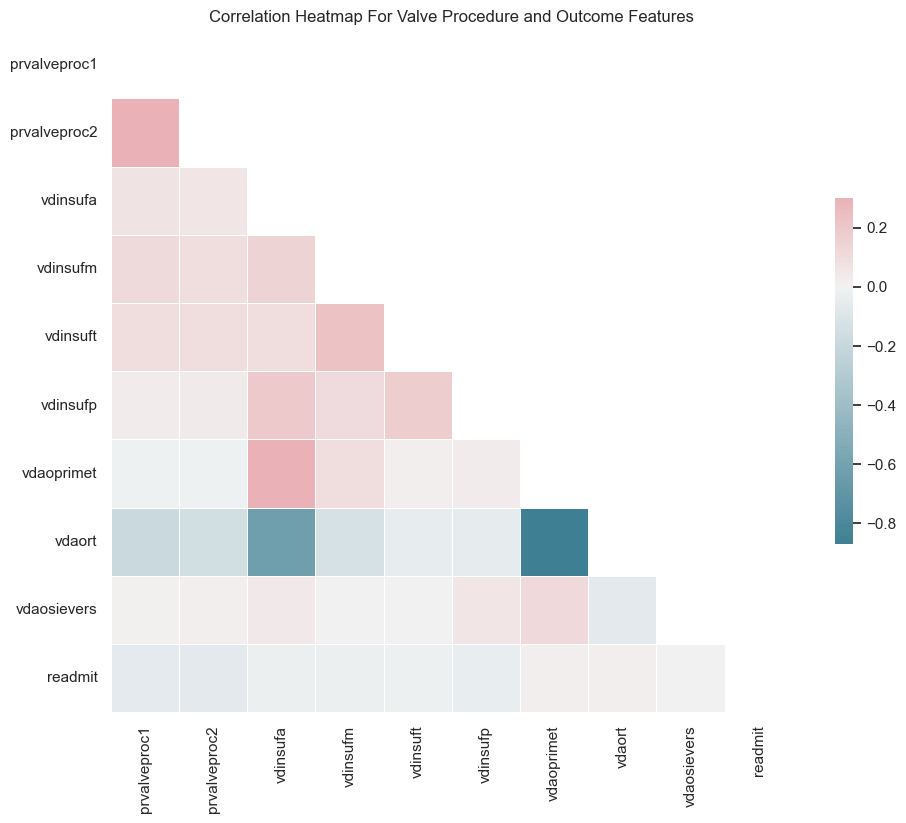

In [54]:


correlation_matrix=df_combined.corr()
sns.set(style = "white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap For Valve Procedure and Outcome Features")
plt.show()

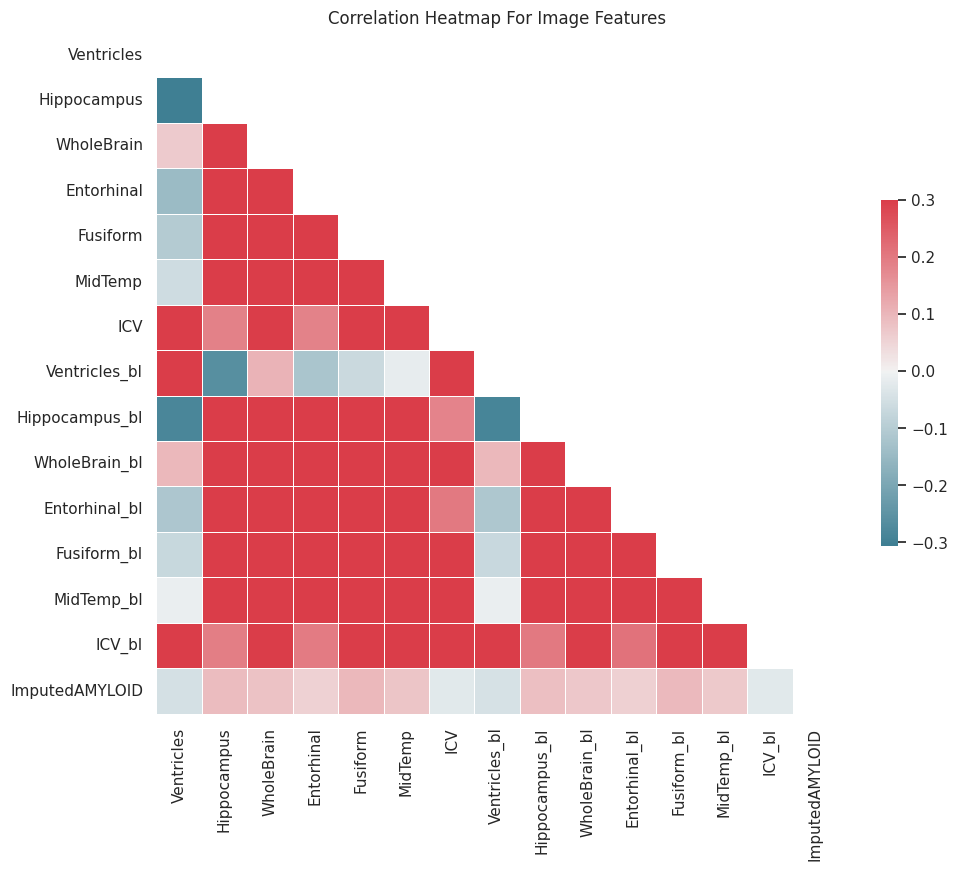

In [ ]:


correlation_matrix=df_imgfeatures_clean.corr()
sns.set(style = "white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap For Image Features")
plt.show()

## ***Part 3: Classifier Training Exploration on Image Features***

### **Part 3.1: Balanced Random Forests**

In [ ]:
# Split into train-test set
#Scale the numerical features
scaler = StandardScaler()
df_imgfeatures_clean.dropna(inplace=True)
X=df_imgfeatures_clean.loc[:, df_imgfeatures_clean.columns != 'ImputedAMYLOID']
y=df_imgfeatures_clean['ImputedAMYLOID']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345, stratify=y, shuffle=True)
cols=['Ventricles', 'Hippocampus',
       'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV',
       'Ventricles_bl', 'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl',
       'Fusiform_bl', 'MidTemp_bl', 'ICV_bl']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
df_combined

,ImputedAMYLOID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,Ventricles_bl,Hippocampus_bl,...,AGE,PTRACCAT,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_learning,RAVLT_perc_forgetting,EcogPtTotal,EcogSPTotal
100,0,18783.0,8005.0,949275.0,3057.0,18199.0,17376.0,1408090.0,13987.0,8147.0,...,72.6,2,2.00,4.00,2.0,29.0,9.0,14.28570,1.61538,1.00000
104,0,20393.0,7824.0,930385.0,3151.0,18069.0,17335.0,1394470.0,13987.0,8147.0,...,72.6,2,1.00,1.00,0.0,28.0,7.0,6.66667,1.38462,1.00000
108,0,22559.0,7514.0,897623.0,2684.0,17333.0,16170.0,1379450.0,13987.0,8147.0,...,72.6,2,3.00,5.00,2.0,27.0,8.0,14.28570,1.53846,1.00000
125,0,28003.0,7993.0,1042520.0,3969.0,19610.0,20399.0,1536060.0,21897.0,8310.0,...,71.7,2,5.00,10.00,4.0,26.0,7.0,18.18180,1.28205,1.05128
127,1,29028.0,7825.0,1038660.0,3682.0,19254.0,20024.0,1536940.0,21897.0,8310.0,...,71.7,2,6.00,10.00,3.0,27.0,4.0,50.00000,1.23077,1.21622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16287,0,22544.1,7308.5,887532.0,4463.0,16771.0,16563.0,1231140.0,22544.1,7308.5,...,76.5,6,8.33,17.33,4.0,24.0,8.0,50.00000,1.55263,1.68421
16288,0,15577.1,7273.4,991078.0,4172.0,15170.0,17957.0,1344660.0,15577.1,7273.4,...,73.3,6,8.33,14.33,6.0,27.0,5.0,36.36360,1.84211,1.56757
16290,0,35481.3,6223.0,1159410.0,3688.0,21338.0,20407.0,1660820.0,35481.3,6223.0,...,79.7,6,13.67,23.67,9.0,29.0,1.0,40.00000,1.52632,2.39474
16292,0,46308.0,5915.5,988513.0,2410.0,19840.0,19220.0,1472370.0,46308.0,5915.5,...,75.2,6,14.33,24.33,8.0,24.0,3.0,42.85710,1.84211,3.47368


In [ ]:
# Random Forest
import warnings

# Filter deprecation warning from a specific location
warnings.filterwarnings("ignore", message="Function delayed is deprecated", module="sklearn.utils.deprecation")

# Filter user warning from a specific location
warnings.filterwarnings("ignore", message="`sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel`", module="sklearn.utils.parallel")

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,cross_val_score
from imblearn.ensemble import BalancedRandomForestClassifier

seed = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Define the Logistic Regression classification model/estimator
estimator = BalancedRandomForestClassifier(random_state=42,replacement=True)
#estimator = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000)
#min_samples_split=2,min_samples_leaf=4

# Define the hyperparameter search space/grid
param_grid = {
    'n_estimators': [2,10,20,60],
    'max_depth':[3,5,10,20],


}

# Define the metric as a lower case string (for example: scoring = 'accuracy')
scoring = 'f1','roc_auc'

search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring=scoring, verbose=0, n_jobs=-1 ,refit='roc_auc',error_score='raise')

search.fit(X_train, y_train)
auc_scores = cross_val_score(search, X_train, y_train, cv=cv, scoring='roc_auc', error_score='raise',n_jobs=-1)
precision_scores = cross_val_score(search, X_train, y_train, cv=cv, scoring='f1', error_score='raise',n_jobs=-1)
recall_scores = cross_val_score(search, X_train, y_train, cv=cv, scoring='average_precision', error_score='raise',n_jobs=-1)

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score, recall_score

y_test_pred = search.best_estimator_.predict(X_test)
test_auc_score = roc_auc_score(y_test, y_test_pred)
test_precision_score = f1_score(y_test, y_test_pred)
test_recall = average_precision_score(y_test,y_test_pred)


#print(f'The best Logistic Regression model has hyperparameters {search.best_params_}')
#print(f'The best model achieves an average cross-validation score of {search.best_score_*100:.2f}%')
print(f'The best model achieves a train F-1 score of {np.mean(precision_scores)*100:.2f}% on the train data')
print(f'The best model achieves train AUC score of {np.mean(auc_scores)*100:.2f}% on the train data')
print(f'The best model achieves train recall score of {np.mean(recall_scores)*100:.2f}% on the train data')


print(f'The best model achieves a Test F-1 score of {test_precision_score*100:.2f}% on the testing data')
print(f'The best model achieves Test AUC score of {test_auc_score*100:.2f}% on the testing data')
print(f'The best model achieves Test Recall score of {test_recall*100:.2f}% on the testing data')
print("Best parameters:", search.best_params_)

The best model achieves a train F-1 score of 44.74% on the train data
The best model achieves train AUC score of 58.35% on the train data
The best model achieves train recall score of 39.64% on the train data
The best model achieves a Test F-1 score of 41.74% on the testing data
The best model achieves Test AUC score of 54.04% on the testing data
The best model achieves Test Recall score of 34.60% on the testing data
Best parameters: {'max_depth': 3, 'n_estimators': 60}


In [ ]:
#Confusion Matrix
y_train_pred = search.best_estimator_.predict(X_train)
from sklearn.metrics import confusion_matrix
cm_test_dt = confusion_matrix(y_test, y_test_pred)
cm_test_dt = cm_test_dt.astype('float') / cm_test_dt.sum(axis=1)[:, np.newaxis]
cm_train_dt = confusion_matrix(y_train, y_train_pred)
cm_train_dt = cm_train_dt.astype('float') / cm_train_dt.sum(axis=1)[:, np.newaxis]

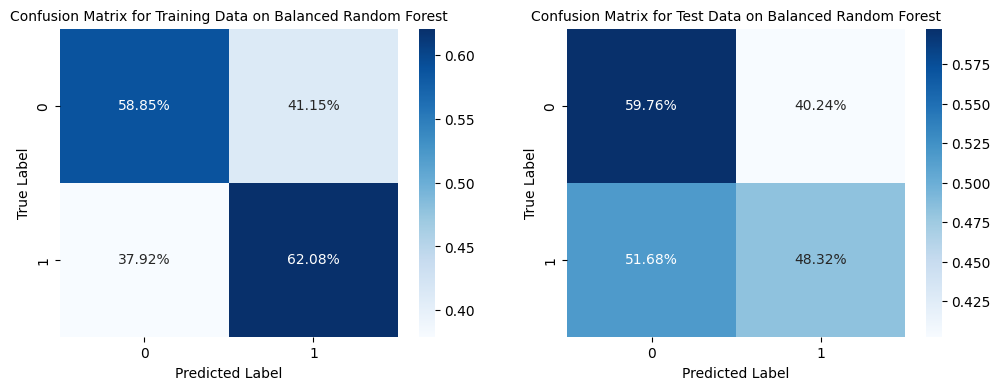

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(cm_train_dt, annot=True, fmt='.2%', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix for Training Data on Balanced Random Forest', fontsize= 10)
ax1.set_xlabel('Predicted Label', fontsize = 10)
ax1.set_ylabel('True Label', fontsize = 10)

sns.heatmap(cm_test_dt, annot=True, fmt='.2%', cmap='Blues', ax=ax2)
ax2.set_title('Confusion Matrix for Test Data on Balanced Random Forest', fontsize = 10)
ax2.set_xlabel('Predicted Label', fontsize = 10)
ax2.set_ylabel('True Label', fontsize = 10)

plt.show()

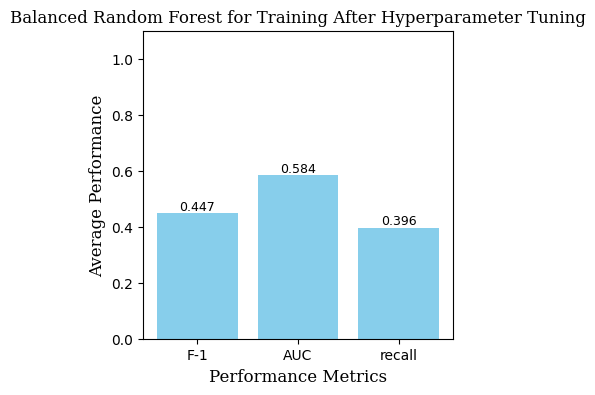

In [ ]:
labels = ['F-1','AUC','recall']
rf_training_metrics = [np.mean(precision_scores), np.mean(auc_scores), np.mean(recall_scores)]
rf_test_metrics = [test_precision_score, test_auc_score, test_recall]


plt.figure(figsize=(4, 4))
bars = plt.bar(labels, rf_training_metrics, color='skyblue')
plt.xlabel('Performance Metrics', family='serif', fontsize = 12)
plt.ylabel('Average Performance', family='serif', fontsize = 12)
plt.title('Balanced Random Forest for Training After Hyperparameter Tuning', family='serif',  fontsize = 12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', fontsize=9, color='black')

plt.ylim([0, 1.1])
plt.show()

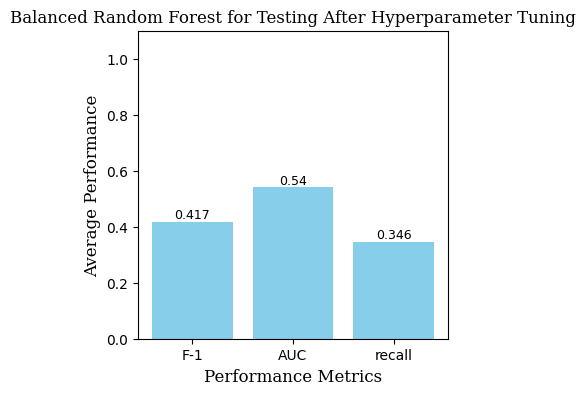

In [ ]:
plt.figure(figsize=(4, 4))
bars = plt.bar(labels, rf_test_metrics, color='skyblue')
plt.xlabel('Performance Metrics', family='serif', fontsize = 12)
plt.ylabel('Average Performance', family='serif', fontsize = 12)
plt.title('Balanced Random Forest for Testing After Hyperparameter Tuning', family='serif',  fontsize = 12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', fontsize=9, color='black')

plt.ylim([0, 1.1])
plt.show()

### **Part 3.2: Light GBM Classifier**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,cross_val_score
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score

seed = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Define the Logistic Regression classification model/estimator
estimator = LGBMClassifier(class_weight='balanced',random_state=42,max_bin=500,num_iterations=200,learning_rate=0.1)
#estimator = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000)
#n_estimators=30, max_depth = 10,num_leaves=22,random_state=42,class_weight='balanced'

# Define the hyperparameter search space/grid
param_grid = {
    'n_estimators': [10,15,20,30],
    'max_depth':[2,5,8,10],


}
#'num_iterations':[150,200,400,500]
# Define the metric as a lower case string (for example: scoring = 'accuracy')
scoring = 'average_precision','roc_auc'

search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring=scoring, verbose=2, n_jobs=-1,refit='roc_auc')

search.fit(X_train, y_train)
auc_scores = cross_val_score(search, X_train, y_train, cv=cv, scoring='roc_auc', error_score='raise',n_jobs=-1)
precision_scores = cross_val_score(search, X_train, y_train, cv=cv, scoring='f1', error_score='raise',n_jobs=-1)
recall_scores = cross_val_score(search, X_train, y_train, cv=cv, scoring='recall', error_score='raise',n_jobs=-1)

from sklearn.metrics import roc_auc_score, f1_score, average_precision_score

y_test_pred = search.best_estimator_.predict(X_test)
test_auc_score = roc_auc_score(y_test, y_test_pred)
test_precision_score = f1_score(y_test, y_test_pred)
test_recall = recall_score(y_test,y_test_pred)


#print(f'The best Logistic Regression model has hyperparameters {search.best_params_}')
#print(f'The best model achieves an average cross-validation score of {search.best_score_*100:.2f}%')
print(f'The best model achieves a train F-1 score of {np.mean(precision_scores)*100:.2f}% on the train data')
print(f'The best model achieves train AUC score of {np.mean(auc_scores)*100:.2f}% on the train data')
print(f'The best model achieves train recall score of {np.mean(recall_scores)*100:.2f}% on the train data')


print(f'The best model achieves a Test F-1 score of {test_precision_score*100:.2f}% on the testing data')
print(f'The best model achieves Test AUC score of {test_auc_score*100:.2f}% on the testing data')
print(f'The best model achieves Test Recall score of {test_recall*100:.2f}% on the testing data')


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 952, number of negative: 1966
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8141
[LightGBM] [Info] Number of data points in the train set: 2918, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
#Confusion Matrix
y_train_pred = search.best_estimator_.predict(X_train)
from sklearn.metrics import confusion_matrix
cm_test_dt = confusion_matrix(y_test, y_test_pred)
cm_test_dt = cm_test_dt.astype('float') / cm_test_dt.sum(axis=1)[:, np.newaxis]
cm_train_dt = confusion_matrix(y_train, y_train_pred)
cm_train_dt = cm_train_dt.astype('float') / cm_train_dt.sum(axis=1)[:, np.newaxis]

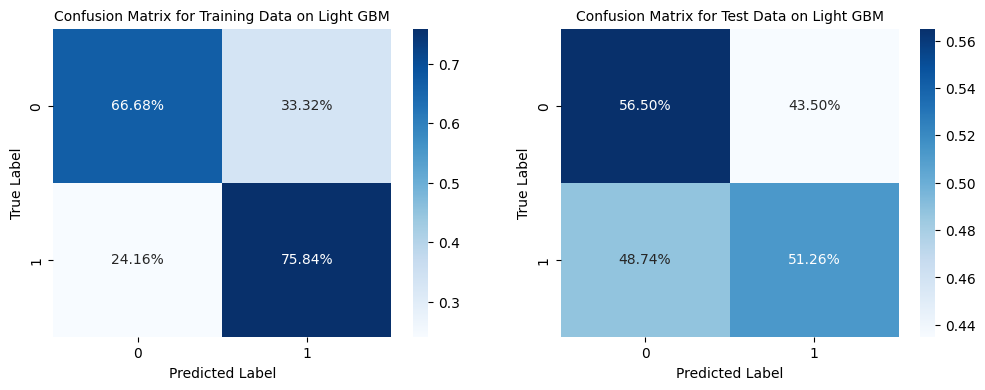

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(cm_train_dt, annot=True, fmt='.2%', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix for Training Data on Light GBM', fontsize= 10)
ax1.set_xlabel('Predicted Label', fontsize = 10)
ax1.set_ylabel('True Label', fontsize = 10)

sns.heatmap(cm_test_dt, annot=True, fmt='.2%', cmap='Blues', ax=ax2)
ax2.set_title('Confusion Matrix for Test Data on Light GBM', fontsize = 10)
ax2.set_xlabel('Predicted Label', fontsize = 10)
ax2.set_ylabel('True Label', fontsize = 10)

plt.show()

In [ ]:
print("Best parameters:", search.best_params_)

Best parameters: {'max_depth': 2, 'n_estimators': 20}


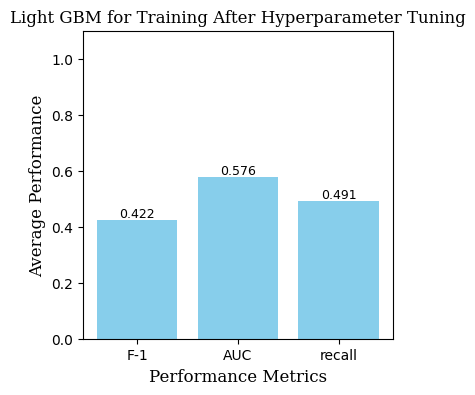

In [ ]:
labels = ['F-1','AUC','recall']
lightgbm_training_metrics = [np.mean(precision_scores), np.mean(auc_scores), np.mean(recall_scores)]
lightgbm_test_metrics = [test_precision_score, test_auc_score, test_recall]


plt.figure(figsize=(4, 4))
bars = plt.bar(labels, lightgbm_training_metrics, color='skyblue')
plt.xlabel('Performance Metrics', family='serif', fontsize = 12)
plt.ylabel('Average Performance', family='serif', fontsize = 12)
plt.title('Light GBM for Training After Hyperparameter Tuning', family='serif',  fontsize = 12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', fontsize=9, color='black')

plt.ylim([0, 1.1])
plt.show()

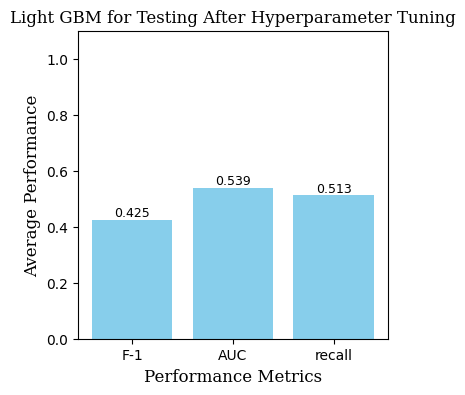

In [ ]:

plt.figure(figsize=(4, 4))
bars = plt.bar(labels, lightgbm_test_metrics, color='skyblue')
plt.xlabel('Performance Metrics', family='serif', fontsize = 12)
plt.ylabel('Average Performance', family='serif', fontsize = 12)
plt.title('Light GBM for Testing After Hyperparameter Tuning', family='serif',  fontsize = 12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', fontsize=9, color='black')

plt.ylim([0, 1.1])
plt.show()

### **Part 3.3: Voting Classifier with Balanced Random Forests and Light GBM**

In [ ]:
## Try random forest + lightgbm
from sklearn.ensemble import VotingClassifier
rf = BalancedRandomForestClassifier(n_estimators=400, max_depth = 50,random_state=42,replacement=True)
lgbm = LGBMClassifier(n_estimators=30, max_depth = 10,num_leaves=22,random_state=42,class_weight='balanced')

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('lgbm', lgbm)], voting='soft')
voting_clf.fit(X_train, y_train)


y_test_pred = voting_clf.predict(X_test)
auc_scores = cross_val_score(voting_clf, X_train, y_train, cv=cv, scoring='roc_auc', error_score='raise',n_jobs=-1)
precision_scores = cross_val_score(voting_clf, X_train, y_train, cv=cv, scoring='f1', error_score='raise',n_jobs=-1)
recall_scores = cross_val_score(voting_clf, X_train, y_train, cv=cv, scoring='recall', error_score='raise',n_jobs=-1)

test_auc_score = roc_auc_score(y_test, y_test_pred)
test_precision_score = f1_score(y_test, y_test_pred)
test_recall = recall_score(y_test,y_test_pred)


print(f'The best combined model ensemble achieves a Test F-1 score of {test_precision_score*100:.2f}% on the testing data')
print(f'The best combined model ensemble achieves Test AUC score of {test_auc_score*100:.2f}% on the testing data')
print(f'The best combined model achieves Test Recall score of {test_recall*100:.2f}% on the testing data')

NameError: name 'BalancedRandomForestClassifier' is not defined

In [ ]:
#Confusion Matrix
y_train_pred = voting_clf.predict(X_train)
from sklearn.metrics import confusion_matrix
cm_test_dt = confusion_matrix(y_test, y_test_pred)
cm_test_dt = cm_test_dt.astype('float') / cm_test_dt.sum(axis=1)[:, np.newaxis]
cm_train_dt = confusion_matrix(y_train, y_train_pred)
cm_train_dt = cm_train_dt.astype('float') / cm_train_dt.sum(axis=1)[:, np.newaxis]

NameError: name 'voting_clf' is not defined

NameError: name 'cm_train_dt' is not defined

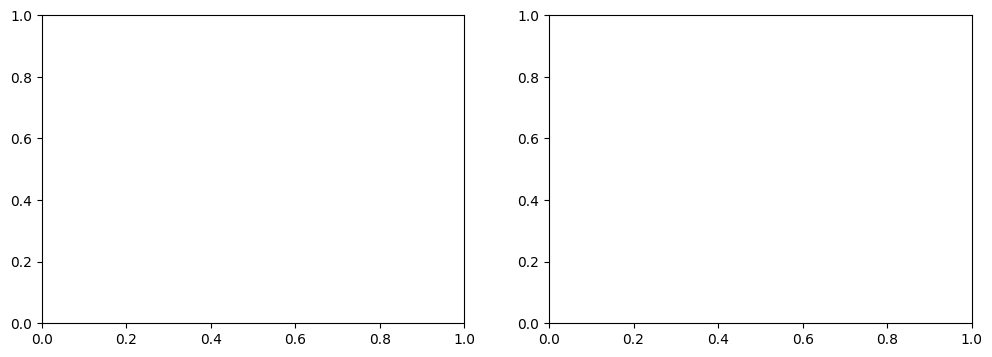

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(cm_train_dt, annot=True, fmt='.2%', cmap='Blues', ax=ax1)
ax1.set_title(f'Confusion Matrix for Training Data on \n Light GBM and Balanced Random Forests Combined', fontsize= 10)
ax1.set_xlabel('Predicted Label', fontsize = 10)
ax1.set_ylabel('True Label', fontsize = 10)

sns.heatmap(cm_test_dt, annot=True, fmt='.2%', cmap='Blues', ax=ax2)
ax2.set_title('Confusion Matrix for Test Data on \n Light GBM and Balanced Random Forests Combined', fontsize = 10)
ax2.set_xlabel('Predicted Label', fontsize = 10)
ax2.set_ylabel('True Label', fontsize = 10)

plt.show()

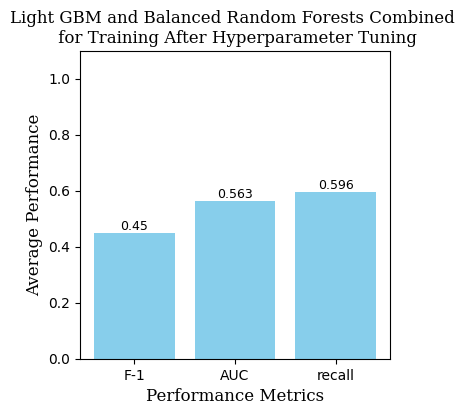

In [ ]:
labels = ['F-1','AUC','recall']
lightgbm_training_metrics = [np.mean(precision_scores), np.mean(auc_scores), np.mean(recall_scores)]
lightgbm_test_metrics = [test_precision_score, test_auc_score, test_recall]


plt.figure(figsize=(4, 4))
bars = plt.bar(labels, lightgbm_training_metrics, color='skyblue')
plt.xlabel('Performance Metrics', family='serif', fontsize = 12)
plt.ylabel('Average Performance', family='serif', fontsize = 12)
plt.title('Light GBM and Balanced Random Forests Combined \n for Training After Hyperparameter Tuning', family='serif',  fontsize = 12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', fontsize=9, color='black')

plt.ylim([0, 1.1])
plt.show()

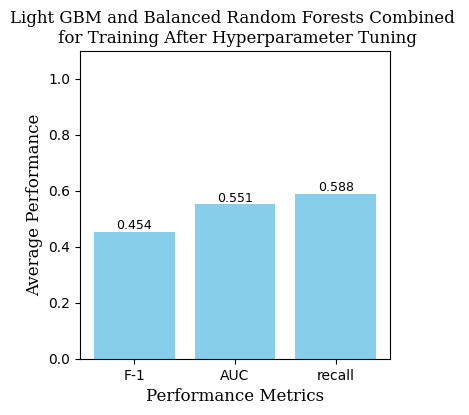

In [ ]:

plt.figure(figsize=(4, 4))
bars = plt.bar(labels, lightgbm_test_metrics, color='skyblue')
plt.xlabel('Performance Metrics', family='serif', fontsize = 12)
plt.ylabel('Average Performance', family='serif', fontsize = 12)
plt.title('Light GBM and Balanced Random Forests Combined \n for Training After Hyperparameter Tuning', family='serif',  fontsize = 12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', fontsize=9, color='black')

plt.ylim([0, 1.1])
plt.show()

## ***Part 4: Classifier Training Exploration on Demographic and Cognitive Features***

In [ ]:
# Split into train-test set
#Scale the numerical features
scaler = StandardScaler()
df_clinical_vars_clean.dropna(inplace=True)
X2=df_clinical_vars_clean.loc[:, df_clinical_vars_clean.columns != 'ImputedAMYLOID']
y2=df_clinical_vars_clean['ImputedAMYLOID']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=12345, stratify=y2, shuffle=True)
cols= list(df_clinical_vars_clean.loc[:, df_clinical_vars_clean.columns != 'ImputedAMYLOID'].columns)
X2_train[cols] = scaler.fit_transform(X2_train[cols])
X2_test[cols] = scaler.transform(X2_test[cols])

X2_train=np.array(X2_train)
y2_train=np.array(y2_train)
X2_test=np.array(X2_test)
y2_test=np.array(y2_test)

### **Part 4.1: Balanced Random Forests**

In [ ]:
# Random Forest
import warnings

# Filter deprecation warning from a specific location
warnings.filterwarnings("ignore", message="Function delayed is deprecated", module="sklearn.utils.deprecation")

# Filter user warning from a specific location
warnings.filterwarnings("ignore", message="`sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel`", module="sklearn.utils.parallel")

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,cross_val_score
from imblearn.ensemble import BalancedRandomForestClassifier

seed = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Define the Logistic Regression classification model/estimator
estimator = BalancedRandomForestClassifier(class_weight='balanced',random_state=42)
#estimator = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000)

# Define the hyperparameter search space/grid
param_grid = {
    'n_estimators': [10,15,20,30],
    'max_depth':[2,5,8,10]

}

# Define the metric as a lower case string (for example: scoring = 'accuracy')
scoring = 'f1','roc_auc'

search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring=scoring, verbose=2, n_jobs=-1 ,refit='roc_auc')

search.fit(X2_train, y2_train)
auc_scores = cross_val_score(search, X2_train, y2_train, cv=cv, scoring='roc_auc', error_score='raise',n_jobs=-1)
precision_scores = cross_val_score(search, X2_train, y2_train, cv=cv, scoring='f1', error_score='raise',n_jobs=-1)
recall_scores = cross_val_score(search, X2_train, y2_train, cv=cv, scoring='recall', error_score='raise',n_jobs=-1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score, recall_score

y2_test_pred = search.best_estimator_.predict(X2_test)
test_auc_score = roc_auc_score(y2_test, y2_test_pred)
test_precision_score = f1_score(y2_test, y2_test_pred)
test_recall = recall_score(y2_test,y2_test_pred)


#print(f'The best Logistic Regression model has hyperparameters {search.best_params_}')
#print(f'The best model achieves an average cross-validation score of {search.best_score_*100:.2f}%')
print(f'The best model achieves a train F-1 score of {np.mean(precision_scores)*100:.2f}% on the train data')
print(f'The best model achieves train AUC score of {np.mean(auc_scores)*100:.2f}% on the train data')
print(f'The best model achieves train recall score of {np.mean(recall_scores)*100:.2f}% on the train data')


print(f'The best model achieves a Test F-1 score of {test_precision_score*100:.2f}% on the testing data')
print(f'The best model achieves Test AUC score of {test_auc_score*100:.2f}% on the testing data')
print(f'The best model achieves Test Recall score of {test_recall*100:.2f}% on the testing data')
print("Best parameters:", search.best_params_)

The best model achieves a train F-1 score of 56.53% on the train data
The best model achieves train AUC score of 62.93% on the train data
The best model achieves train recall score of 92.04% on the train data
The best model achieves a Test F-1 score of 56.88% on the testing data
The best model achieves Test AUC score of 55.53% on the testing data
The best model achieves Test Recall score of 94.20% on the testing data
Best parameters: {'max_depth': 5, 'n_estimators': 30}


In [ ]:
#Confusion Matrix
y2_train_pred = search.best_estimator_.predict(X2_train)
from sklearn.metrics import confusion_matrix
cm_test_dt = confusion_matrix(y2_test, y2_test_pred)
cm_test_dt = cm_test_dt.astype('float') / cm_test_dt.sum(axis=1)[:, np.newaxis]
cm_train_dt = confusion_matrix(y2_train, y2_train_pred)
cm_train_dt = cm_train_dt.astype('float') / cm_train_dt.sum(axis=1)[:, np.newaxis]

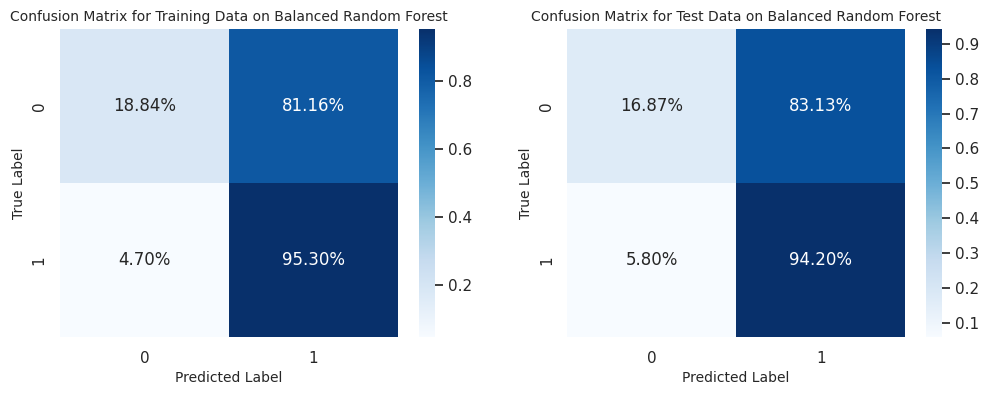

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(cm_train_dt, annot=True, fmt='.2%', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix for Training Data on Balanced Random Forest', fontsize= 10)
ax1.set_xlabel('Predicted Label', fontsize = 10)
ax1.set_ylabel('True Label', fontsize = 10)

sns.heatmap(cm_test_dt, annot=True, fmt='.2%', cmap='Blues', ax=ax2)
ax2.set_title('Confusion Matrix for Test Data on Balanced Random Forest', fontsize = 10)
ax2.set_xlabel('Predicted Label', fontsize = 10)
ax2.set_ylabel('True Label', fontsize = 10)

plt.show()

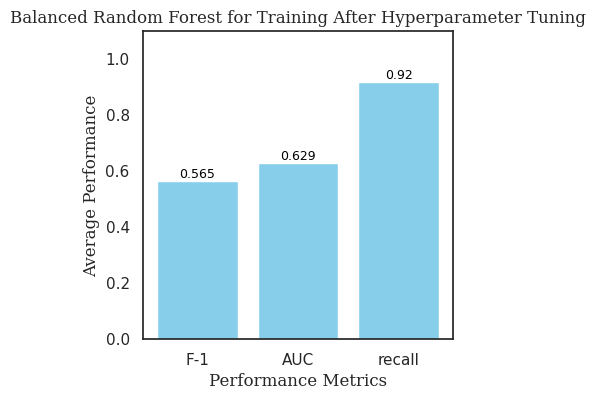

In [ ]:
labels = ['F-1','AUC','recall']
rf_training_metrics = [np.mean(precision_scores), np.mean(auc_scores), np.mean(recall_scores)]
rf_test_metrics = [test_precision_score, test_auc_score, test_recall]


plt.figure(figsize=(4, 4))
bars = plt.bar(labels, rf_training_metrics, color='skyblue')
plt.xlabel('Performance Metrics', family='serif', fontsize = 12)
plt.ylabel('Average Performance', family='serif', fontsize = 12)
plt.title('Balanced Random Forest for Training After Hyperparameter Tuning', family='serif',  fontsize = 12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', fontsize=9, color='black')

plt.ylim([0, 1.1])
plt.show()

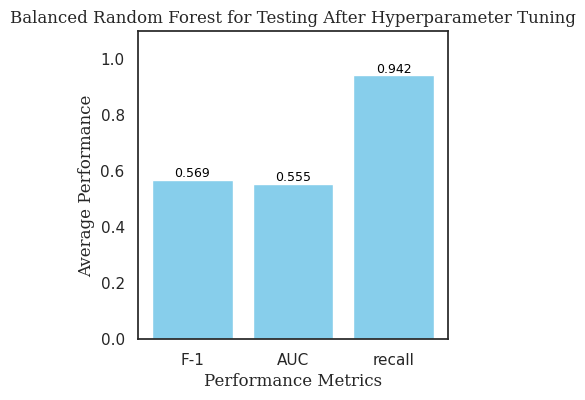

In [ ]:
plt.figure(figsize=(4, 4))
bars = plt.bar(labels, rf_test_metrics, color='skyblue')
plt.xlabel('Performance Metrics', family='serif', fontsize = 12)
plt.ylabel('Average Performance', family='serif', fontsize = 12)
plt.title('Balanced Random Forest for Testing After Hyperparameter Tuning', family='serif',  fontsize = 12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', fontsize=9, color='black')

plt.ylim([0, 1.1])
plt.show()

### **Part 4.2: Light GBM Classifier**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,cross_val_score
from lightgbm import LGBMClassifier

seed = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Define the Logistic Regression classification model/estimator
estimator = LGBMClassifier(class_weight='balanced')
#estimator = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000)

# Define the hyperparameter search space/grid
param_grid = {
    'n_estimators': [10,15,20,30],
    'max_depth':[2,5,8,10]

}

# Define the metric as a lower case string (for example: scoring = 'accuracy')
scoring = 'average_precision','roc_auc'

search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring=scoring, verbose=2, n_jobs=-1,refit='roc_auc')

search.fit(X2_train, y2_train)
auc_scores = cross_val_score(search, X2_train, y2_train, cv=cv, scoring='roc_auc', error_score='raise',n_jobs=-1)
precision_scores = cross_val_score(search, X2_train, y2_train, cv=cv, scoring='f1', error_score='raise',n_jobs=-1)
recall_scores = cross_val_score(search, X2_train, y2_train, cv=cv, scoring='recall', error_score='raise',n_jobs=-1)

from sklearn.metrics import roc_auc_score, f1_score, average_precision_score

y2_test_pred = search.best_estimator_.predict(X2_test)
test_auc_score = roc_auc_score(y2_test, y2_test_pred)
test_precision_score = f1_score(y2_test, y2_test_pred)
test_recall = recall_score(y2_test,y2_test_pred)


#print(f'The best Logistic Regression model has hyperparameters {search.best_params_}')
#print(f'The best model achieves an average cross-validation score of {search.best_score_*100:.2f}%')
print(f'The best model achieves a train F-1 score of {np.mean(precision_scores)*100:.2f}% on the train data')
print(f'The best model achieves train AUC score of {np.mean(auc_scores)*100:.2f}% on the train data')
print(f'The best model achieves train recall score of {np.mean(recall_scores)*100:.2f}% on the train data')


print(f'The best model achieves a Test F-1 score of {test_precision_score*100:.2f}% on the testing data')
print(f'The best model achieves Test AUC score of {test_auc_score*100:.2f}% on the testing data')
print(f'The best model achieves Test AUC score of {test_recall*100:.2f}% on the testing data')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 1999, number of negative: 3297
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1393
[LightGBM] [Info] Number of data points in the train set: 5296, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
The best model achieves a train F-1 score of 55.44% on the train data
The best model achieves train AUC score of 63.42% on the train data
The best model achieves train recall score of 71.34% on the train data
The best model achieves a Test F-1 score of 54.19% on the testing data
The best model achieves Test AUC score of 59.09% on the testing data
The best model achieves Test AUC sc

In [ ]:
#Confusion Matrix
y2_train_pred = search.best_estimator_.predict(X2_train)
from sklearn.metrics import confusion_matrix
cm_test_dt = confusion_matrix(y2_test, y2_test_pred)
cm_test_dt = cm_test_dt.astype('float') / cm_test_dt.sum(axis=1)[:, np.newaxis]
cm_train_dt = confusion_matrix(y2_train, y2_train_pred)
cm_train_dt = cm_train_dt.astype('float') / cm_train_dt.sum(axis=1)[:, np.newaxis]

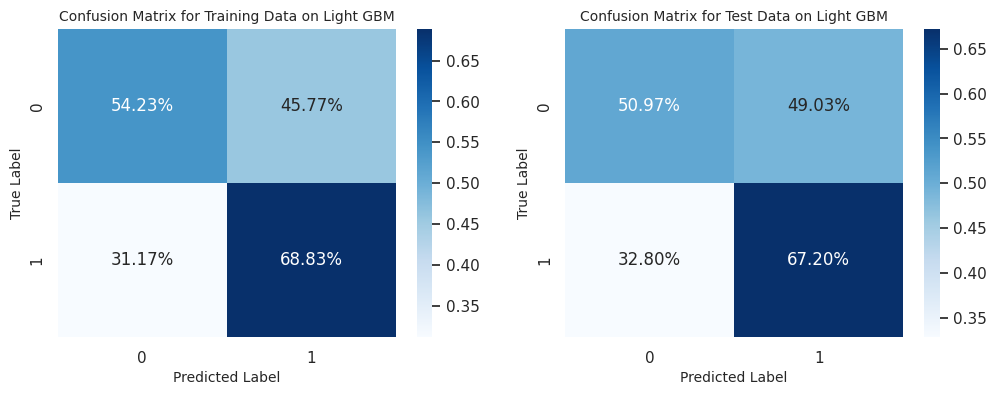

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(cm_train_dt, annot=True, fmt='.2%', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix for Training Data on Light GBM', fontsize= 10)
ax1.set_xlabel('Predicted Label', fontsize = 10)
ax1.set_ylabel('True Label', fontsize = 10)

sns.heatmap(cm_test_dt, annot=True, fmt='.2%', cmap='Blues', ax=ax2)
ax2.set_title('Confusion Matrix for Test Data on Light GBM', fontsize = 10)
ax2.set_xlabel('Predicted Label', fontsize = 10)
ax2.set_ylabel('True Label', fontsize = 10)

plt.show()

In [ ]:
print("Best parameters:", search.best_params_)

Best parameters: {'max_depth': 2, 'n_estimators': 30}


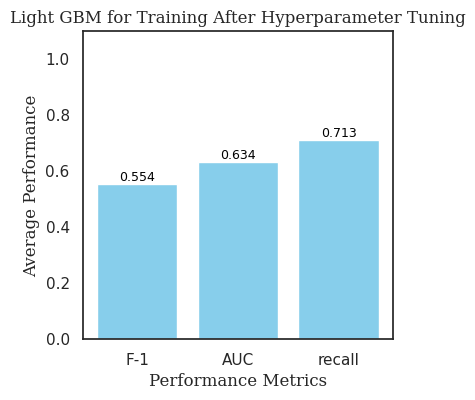

In [ ]:
labels = ['F-1','AUC','recall']
lightgbm_training_metrics = [np.mean(precision_scores), np.mean(auc_scores), np.mean(recall_scores)]
lightgbm_test_metrics = [test_precision_score, test_auc_score, test_recall]


plt.figure(figsize=(4, 4))
bars = plt.bar(labels, lightgbm_training_metrics, color='skyblue')
plt.xlabel('Performance Metrics', family='serif', fontsize = 12)
plt.ylabel('Average Performance', family='serif', fontsize = 12)
plt.title('Light GBM for Training After Hyperparameter Tuning', family='serif',  fontsize = 12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', fontsize=9, color='black')

plt.ylim([0, 1.1])
plt.show()

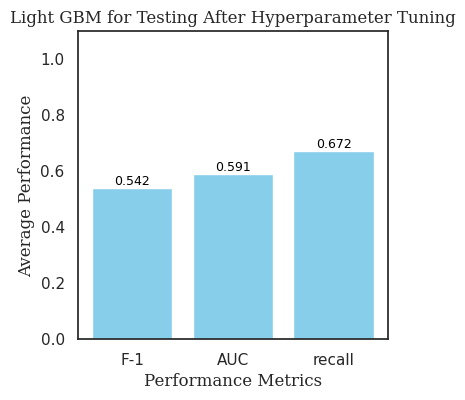

In [ ]:

plt.figure(figsize=(4, 4))
bars = plt.bar(labels, lightgbm_test_metrics, color='skyblue')
plt.xlabel('Performance Metrics', family='serif', fontsize = 12)
plt.ylabel('Average Performance', family='serif', fontsize = 12)
plt.title('Light GBM for Testing After Hyperparameter Tuning', family='serif',  fontsize = 12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', fontsize=9, color='black')

plt.ylim([0, 1.1])
plt.show()

### **Part 4.3: Voting Classifier with Balanced Random Forests and Light GBM**

In [ ]:
## Try random forest + lightgbm
from sklearn.ensemble import VotingClassifier
rf = BalancedRandomForestClassifier(n_estimators=30, random_state=42)
lgbm = LGBMClassifier(n_estimators=30, random_state=42)

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('lgbm', lgbm)], voting='soft')
voting_clf.fit(X2_train, y2_train)


y2_test_pred = voting_clf.predict(X2_test)
auc_scores = cross_val_score(voting_clf, X2_train, y2_train, cv=cv, scoring='roc_auc', error_score='raise',n_jobs=-1)
precision_scores = cross_val_score(voting_clf, X2_train, y2_train, cv=cv, scoring='f1', error_score='raise',n_jobs=-1)
recall_scores = cross_val_score(voting_clf, X2_train, y2_train, cv=cv, scoring='recall', error_score='raise',n_jobs=-1)

test_auc_score = roc_auc_score(y2_test, y2_test_pred)
test_precision_score = f1_score(y2_test, y2_test_pred)
test_recall = recall_score(y2_test,y2_test_pred)


print(f'The best combined model ensemble achieves a Test F-1 score of {test_precision_score*100:.2f}% on the testing data')
print(f'The best combined model ensemble achieves Test AUC score of {test_auc_score*100:.2f}% on the testing data')
print(f'The best combined model achieves Test AUC score of {test_recall*100:.2f}% on the testing data')

[LightGBM] [Info] Number of positive: 1999, number of negative: 3297
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1393
[LightGBM] [Info] Number of data points in the train set: 5296, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377455 -> initscore=-0.500366
[LightGBM] [Info] Start training from score -0.500366
The best combined model ensemble achieves a Test F-1 score of 45.05% on the testing data
The best combined model ensemble achieves Test AUC score of 57.08% on the testing data
The best combined model achieves Test AUC score of 42.80% on the testing data


In [ ]:
#Confusion Matrix
y2_train_pred = voting_clf.predict(X2_train)
from sklearn.metrics import confusion_matrix
cm_test_dt = confusion_matrix(y2_test, y2_test_pred)
cm_test_dt = cm_test_dt.astype('float') / cm_test_dt.sum(axis=1)[:, np.newaxis]
cm_train_dt = confusion_matrix(y2_train, y2_train_pred)
cm_train_dt = cm_train_dt.astype('float') / cm_train_dt.sum(axis=1)[:, np.newaxis]

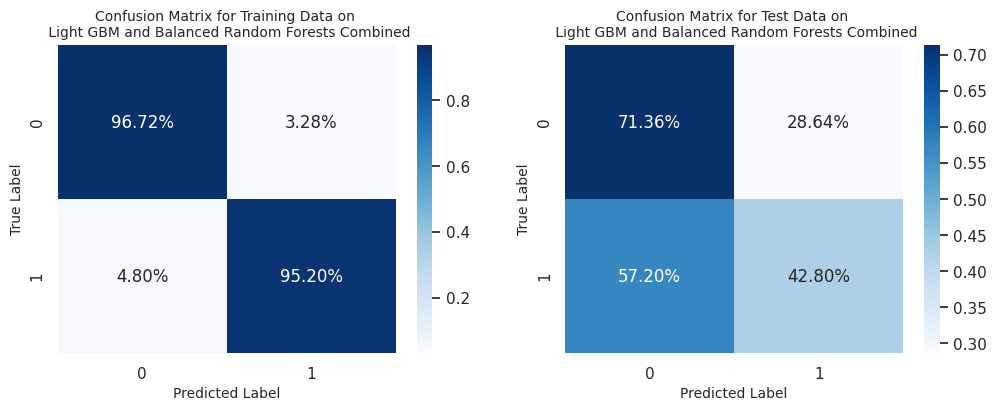

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(cm_train_dt, annot=True, fmt='.2%', cmap='Blues', ax=ax1)
ax1.set_title(f'Confusion Matrix for Training Data on \n Light GBM and Balanced Random Forests Combined', fontsize= 10)
ax1.set_xlabel('Predicted Label', fontsize = 10)
ax1.set_ylabel('True Label', fontsize = 10)

sns.heatmap(cm_test_dt, annot=True, fmt='.2%', cmap='Blues', ax=ax2)
ax2.set_title('Confusion Matrix for Test Data on \n Light GBM and Balanced Random Forests Combined', fontsize = 10)
ax2.set_xlabel('Predicted Label', fontsize = 10)
ax2.set_ylabel('True Label', fontsize = 10)

plt.show()

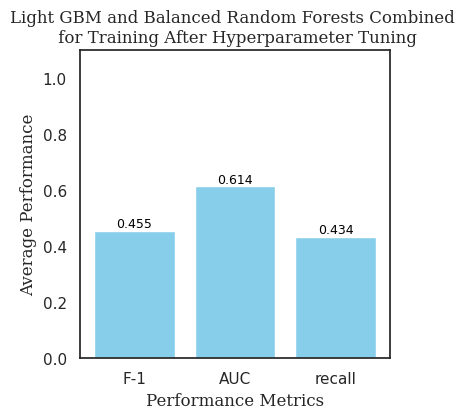

In [ ]:
labels = ['F-1','AUC','recall']
lightgbm_training_metrics = [np.mean(precision_scores), np.mean(auc_scores), np.mean(recall_scores)]
lightgbm_test_metrics = [test_precision_score, test_auc_score, test_recall]


plt.figure(figsize=(4, 4))
bars = plt.bar(labels, lightgbm_training_metrics, color='skyblue')
plt.xlabel('Performance Metrics', family='serif', fontsize = 12)
plt.ylabel('Average Performance', family='serif', fontsize = 12)
plt.title('Light GBM and Balanced Random Forests Combined \n for Training After Hyperparameter Tuning', family='serif',  fontsize = 12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', fontsize=9, color='black')

plt.ylim([0, 1.1])
plt.show()

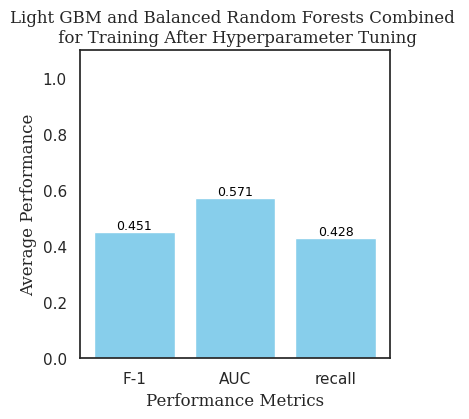

In [ ]:

plt.figure(figsize=(4, 4))
bars = plt.bar(labels, lightgbm_test_metrics, color='skyblue')
plt.xlabel('Performance Metrics', family='serif', fontsize = 12)
plt.ylabel('Average Performance', family='serif', fontsize = 12)
plt.title('Light GBM and Balanced Random Forests Combined \n for Training After Hyperparameter Tuning', family='serif',  fontsize = 12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', fontsize=9, color='black')

plt.ylim([0, 1.1])
plt.show()

## ***Part 5: Unsupervised Feature Selection Using PCA and K-Means on Image Features***

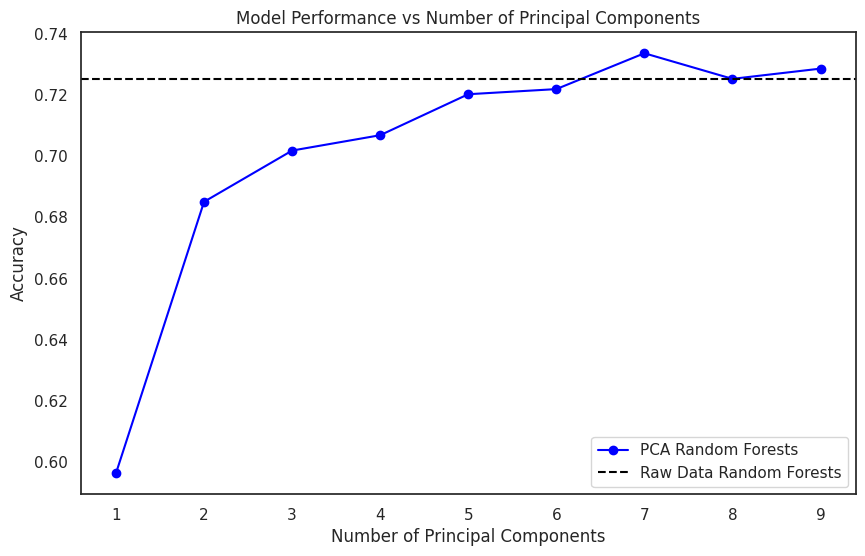

In [ ]:
##PCA
from sklearn.decomposition import PCA
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_raw = rf.predict(X_test)
y_pred_raw_binary = (y_pred_raw >= 0.5).astype(int)
correct_predictions = np.sum(y_pred_raw_binary == y_test)
accuracy_raw = correct_predictions / len(y_test)
accuracies_pca = []
for n_components in range(1, 10):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    rf_pca = RandomForestClassifier(class_weight='balanced')
    rf_pca.fit(X_train_pca, y_train)
    y_pred_pca = rf_pca.predict(X_test_pca)

    y_pred_pca_binary = (y_pred_pca >= 0.5).astype(int)
    correct_predictions_pca = np.sum(y_pred_pca_binary == y_test)
    accuracy_pca = correct_predictions_pca / len(y_test)
    accuracies_pca.append(accuracy_pca)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), accuracies_pca, marker='o', linestyle='-', color='blue')
plt.axhline(y=accuracy_raw, color='black', linestyle='--')
plt.title('Model Performance vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.legend(['PCA Random Forests', 'Raw Data Random Forests'])
plt.show()

In [ ]:
def select_n_principal_components(data, variation):
  ## TODO your code here ##
    if variation <= 0 or variation >= 1:
        raise ValueError("Threshold must be between 0 and 1.")
    pca = PCA().fit(data)
    cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
    n_components = (cumulative_variance_ratio < variation).sum() + 1

    return n_components

variation = 0.60
component = select_n_principal_components(X_train, variation)
pca = PCA(component)
pca.fit(X_train)

feature_names = list(X.columns)
top_features = {}

for i, component in enumerate(pca.components_, start=1):
    top_feature_indices = np.argsort(np.abs(component))[-3:]
    top_features_names = [feature_names[index] for index in top_feature_indices]
    top_features[f"PC{i}"] = top_features_names

print(top_features)

{'PC1': ['MidTemp', 'WholeBrain_bl', 'WholeBrain'], 'PC2': ['ICV', 'Ventricles_bl', 'Ventricles']}


In [ ]:
class KMeans:
    '''Implementing Kmeans clustering'''

    def __init__(self, n_clusters, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def compute_centroids(self, X, clusters):
        """
        Computes new centroids positions given the clusters

        INPUT:
        X - m by n matrix, where m is the number of training points
        clusters -  m dimensional vector, where m is the number of training points
                    At an index i, it contains the cluster id that the i-th datapoint
                    in X belongs to.

        OUTPUT:
        centroids - k by n matrix, where k is the number of clusters.
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        # TODO your code here

        for cluster_id in range(self.n_clusters):
            indices = np.where(clusters == cluster_id)[0]
            cluster_points = X[indices]
            centroid = np.mean(cluster_points, axis=0)
            centroids[cluster_id] = centroid

        ## TODO end ##
        return centroids

    def compute_distance(self, X, centroids):
        """
        Computes the distance of each datapoint in X from the centroids of all the clusters

        INPUT:
        X - m by n matrix, where m is the number of training points
        centroids - k by n matrix, where k is the number of clusters

        OUTPUT:
        dist - m by k matrix, for each datapoint in X, the distances from all the k cluster centroids.

        """
        dist = np.zeros((X.shape[0], self.n_clusters))
        # TODO your code here
        for i in range(self.n_clusters):
            dist[:, i] = np.linalg.norm(X - centroids[i], axis=1)


        ## TODO end ##
        return dist

    def find_closest_cluster(self, dist):
        """
        Finds the cluster id that each datapoint in X belongs to

        INPUT:
        dist - m by k matrix, for each datapoint in X, the distances from all the k cluster centroids.

        OUTPUT:
        clusters - m dimensional vector, where m is the number of training points
                    At an index i, it contains the cluster id that the i-th datapoint
                    in X belongs to.

        """
        clusters = np.zeros(dist.shape[0])
        # TODO your code here

        clusters = np.argmin(dist, axis=1)

        ## TODO end ##
        return clusters

    def fit(self, X, init_centroids=None):
        """
        Fit KMeans clustering to given dataset X.

        INPUT:
        X - m by n matrix, where m is the number of training points
        init_centroids (optional) - k by n matrix, where k is the number of clusters

        OUTPUT:
        clusters - m dimensional vector, where m is the number of training points
                    At an index i, it contains the cluster id that the i-th datapoint
                    in X belongs to.
        centroids - k by n matrix, where k is the number of clusters.
                    These are the k cluster centroids, for cluster ids 0 to k-1
        iters_taken - total iterations taken to converge. Should not be more than max_iter.

        """
        # Fix random seed. Do not change this!
        np.random.seed(111)

        ## TODO your code here ##
        # Initialise centroids to random points in the dataset if not provided (i.e. None)

        if init_centroids is None:
            centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        else:
            centroids = init_centroids

        for iters_taken in range(1, self.max_iter + 1):
            dist = self.compute_distance(X, centroids)
            clusters = self.find_closest_cluster(dist)

            new_centroids = self.compute_centroids(X, clusters)


            if np.allclose(centroids, new_centroids, rtol=1e-6):
                break

            centroids = new_centroids

        self.clusters = clusters
        self.centroids = centroids




        # Iterate until kmeans converges or max_iters is reached. In each iteration:
        #  - Update each datapoint's cluster to that whose *centroid* is closest
        #  - Calculate the new *centroid* of each cluster
        #  - Repeat the previous two steps until no centroid value changes.

        ## TODO end ##
        return self.clusters, self.centroids, iters_taken

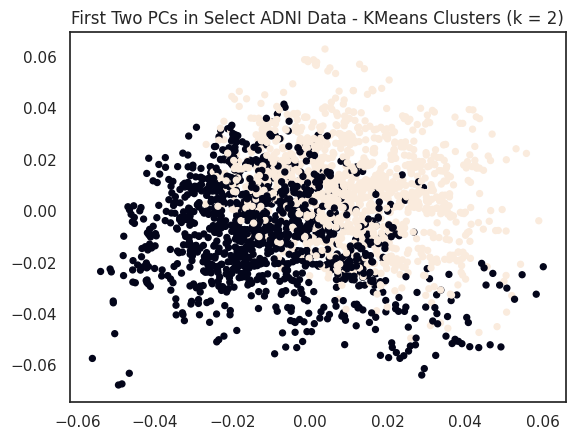

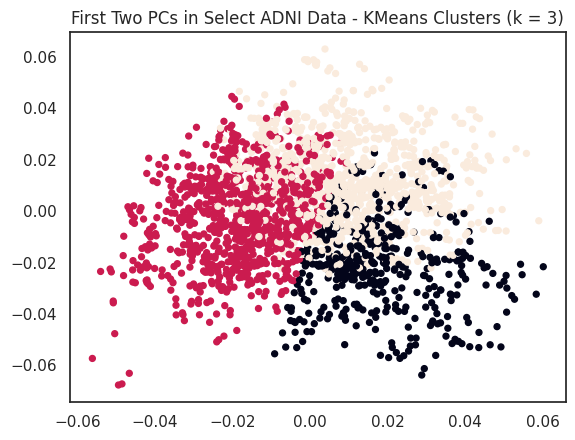

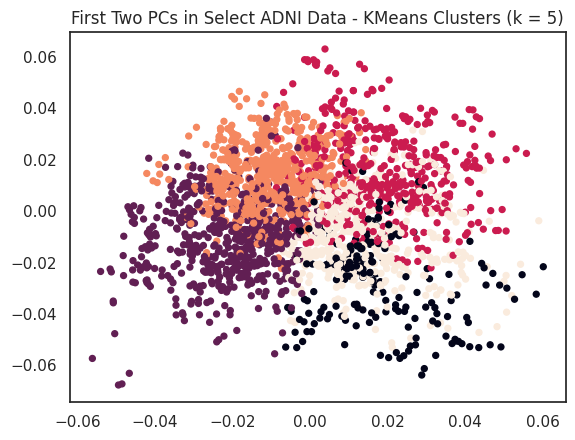

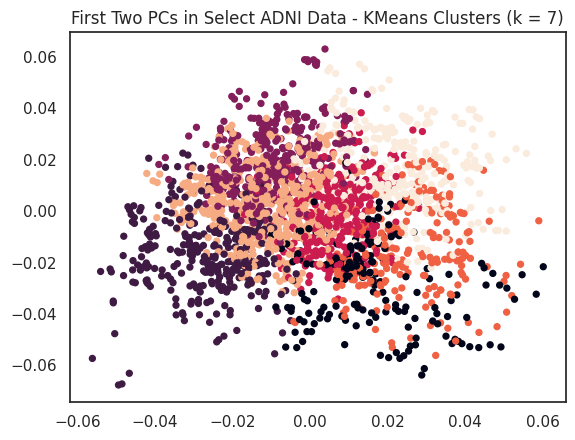

In [ ]:

pca = PCA(n_components = 2)
v = pca.fit(np.transpose(X_train)).components_

for k in [2,3,5,7]:

    clusters = np.zeros(X_train.shape[0])

    ## TODO your code here ##
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)

    clusters = kmeans.clusters


    ## TODO end ##

    plt.scatter(v[0], v[1], c=clusters, s=18)
    plt.title("First Two PCs in Select ADNI Data - KMeans Clusters (k = "+str(k) + ")")
    plt.show()

## ***Part 6: Unsupervised Feature Selection Using PCA and K-Means on Clinical Information***

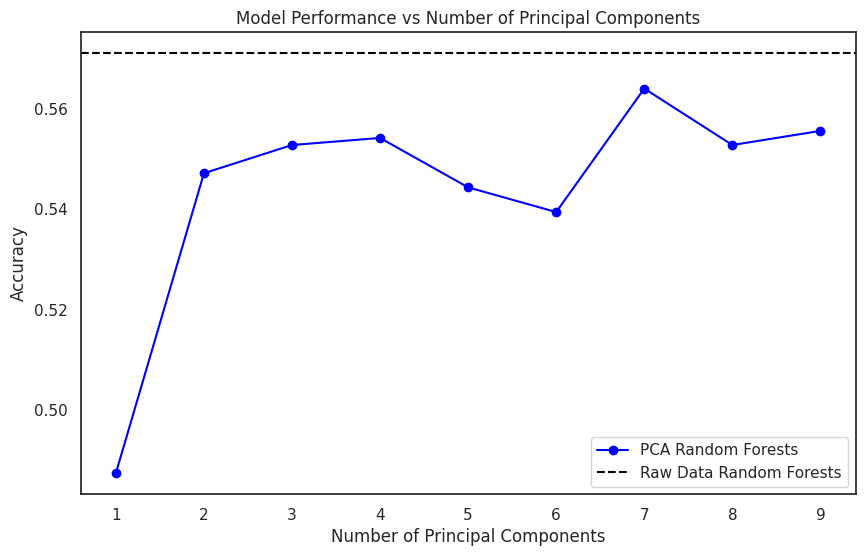

In [ ]:
##PCA
from sklearn.decomposition import PCA
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X2_train, y2_train)
y_pred_raw = rf.predict(X2_test)
y_pred_raw_binary = (y_pred_raw >= 0.5).astype(int)
correct_predictions = np.sum(y_pred_raw_binary == y2_test)
accuracy_raw = correct_predictions / len(y_test)
accuracies_pca = []
for n_components in range(1, 10):
    pca = PCA(n_components=n_components)
    X2_train_pca = pca.fit_transform(X2_train)
    X2_test_pca = pca.transform(X2_test)

    rf_pca = RandomForestClassifier(class_weight='balanced')
    rf_pca.fit(X2_train_pca, y2_train)
    y2_pred_pca = rf_pca.predict(X2_test_pca)

    y_pred_pca_binary = (y2_pred_pca >= 0.5).astype(int)
    correct_predictions_pca = np.sum(y_pred_pca_binary == y2_test)
    accuracy_pca = correct_predictions_pca / len(y_test)
    accuracies_pca.append(accuracy_pca)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), accuracies_pca, marker='o', linestyle='-', color='blue')
plt.axhline(y=accuracy_raw, color='black', linestyle='--')
plt.title('Model Performance vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.legend(['PCA Random Forests', 'Raw Data Random Forests'])
plt.show()

In [ ]:
def select_n_principal_components(data, variation):
  ## TODO your code here ##
    if variation <= 0 or variation >= 1:
        raise ValueError("Threshold must be between 0 and 1.")
    pca = PCA().fit(data)
    cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
    n_components = (cumulative_variance_ratio < variation).sum() + 1

    return n_components

variation = 0.60
component = select_n_principal_components(X2_train, variation)
pca = PCA(component)
pca.fit(X2_train)

feature_names = list(X2.columns)
top_features = {}

for i, component in enumerate(pca.components_, start=1):
    top_feature_indices = np.argsort(np.abs(component))[-3:]
    top_features_names = [feature_names[index] for index in top_feature_indices]
    top_features[f"PC{i}"] = top_features_names

print(top_features)

{'PC1': ['ADASQ4', 'ADAS11', 'ADAS13'], 'PC2': ['AGE', 'index', 'DX_bl'], 'PC3': ['DX_bl', 'PTRACCAT', 'PTGENDER'], 'PC4': ['EcogPtTotal', 'APOE4_VALIDATE', 'PTRACCAT']}


In [ ]:
class KMeans:
    '''Implementing Kmeans clustering'''

    def __init__(self, n_clusters, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def compute_centroids(self, X, clusters):
        """
        Computes new centroids positions given the clusters

        INPUT:
        X - m by n matrix, where m is the number of training points
        clusters -  m dimensional vector, where m is the number of training points
                    At an index i, it contains the cluster id that the i-th datapoint
                    in X belongs to.

        OUTPUT:
        centroids - k by n matrix, where k is the number of clusters.
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        # TODO your code here

        for cluster_id in range(self.n_clusters):
            indices = np.where(clusters == cluster_id)[0]
            cluster_points = X[indices]
            centroid = np.mean(cluster_points, axis=0)
            centroids[cluster_id] = centroid

        ## TODO end ##
        return centroids

    def compute_distance(self, X, centroids):
        """
        Computes the distance of each datapoint in X from the centroids of all the clusters

        INPUT:
        X - m by n matrix, where m is the number of training points
        centroids - k by n matrix, where k is the number of clusters

        OUTPUT:
        dist - m by k matrix, for each datapoint in X, the distances from all the k cluster centroids.

        """
        dist = np.zeros((X.shape[0], self.n_clusters))
        # TODO your code here
        for i in range(self.n_clusters):
            dist[:, i] = np.linalg.norm(X - centroids[i], axis=1)


        ## TODO end ##
        return dist

    def find_closest_cluster(self, dist):
        """
        Finds the cluster id that each datapoint in X belongs to

        INPUT:
        dist - m by k matrix, for each datapoint in X, the distances from all the k cluster centroids.

        OUTPUT:
        clusters - m dimensional vector, where m is the number of training points
                    At an index i, it contains the cluster id that the i-th datapoint
                    in X belongs to.

        """
        clusters = np.zeros(dist.shape[0])
        # TODO your code here

        clusters = np.argmin(dist, axis=1)

        ## TODO end ##
        return clusters

    def fit(self, X, init_centroids=None):
        """
        Fit KMeans clustering to given dataset X.

        INPUT:
        X - m by n matrix, where m is the number of training points
        init_centroids (optional) - k by n matrix, where k is the number of clusters

        OUTPUT:
        clusters - m dimensional vector, where m is the number of training points
                    At an index i, it contains the cluster id that the i-th datapoint
                    in X belongs to.
        centroids - k by n matrix, where k is the number of clusters.
                    These are the k cluster centroids, for cluster ids 0 to k-1
        iters_taken - total iterations taken to converge. Should not be more than max_iter.

        """
        # Fix random seed. Do not change this!
        np.random.seed(111)

        ## TODO your code here ##
        # Initialise centroids to random points in the dataset if not provided (i.e. None)

        if init_centroids is None:
            centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        else:
            centroids = init_centroids

        for iters_taken in range(1, self.max_iter + 1):
            dist = self.compute_distance(X, centroids)
            clusters = self.find_closest_cluster(dist)

            new_centroids = self.compute_centroids(X, clusters)


            if np.allclose(centroids, new_centroids, rtol=1e-6):
                break

            centroids = new_centroids

        self.clusters = clusters
        self.centroids = centroids




        # Iterate until kmeans converges or max_iters is reached. In each iteration:
        #  - Update each datapoint's cluster to that whose *centroid* is closest
        #  - Calculate the new *centroid* of each cluster
        #  - Repeat the previous two steps until no centroid value changes.

        ## TODO end ##
        return self.clusters, self.centroids, iters_taken

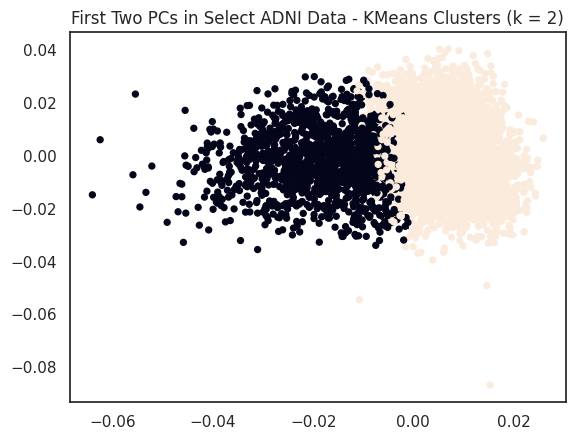

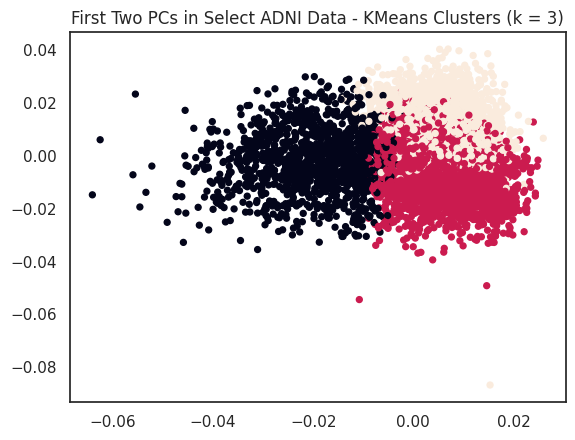

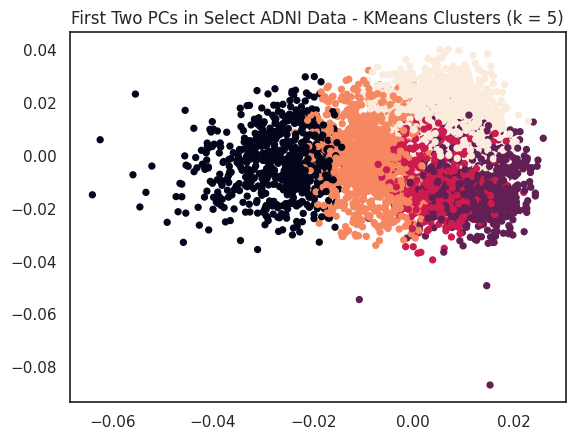

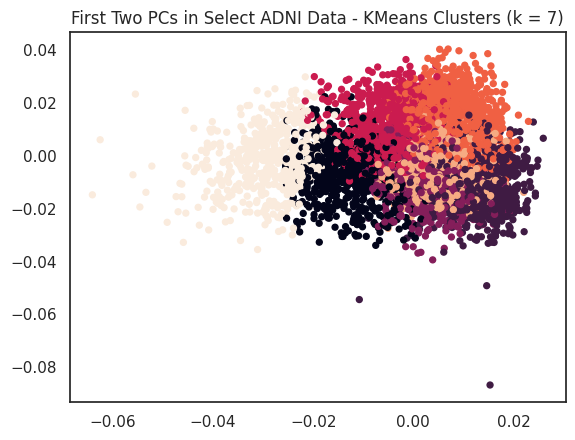

In [ ]:

pca = PCA(n_components = 2)
v = pca.fit(np.transpose(X2_train)).components_

for k in [2,3,5,7]:

    clusters = np.zeros(X2_train.shape[0])

    ## TODO your code here ##
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2_train)

    clusters = kmeans.clusters


    ## TODO end ##

    plt.scatter(v[0], v[1], c=clusters, s=18)
    plt.title("First Two PCs in Select ADNI Data - KMeans Clusters (k = "+str(k) + ")")
    plt.show()